# 1: Business Type and Fraud
## 1.1 Which types of businesses are most targeted for fraud?

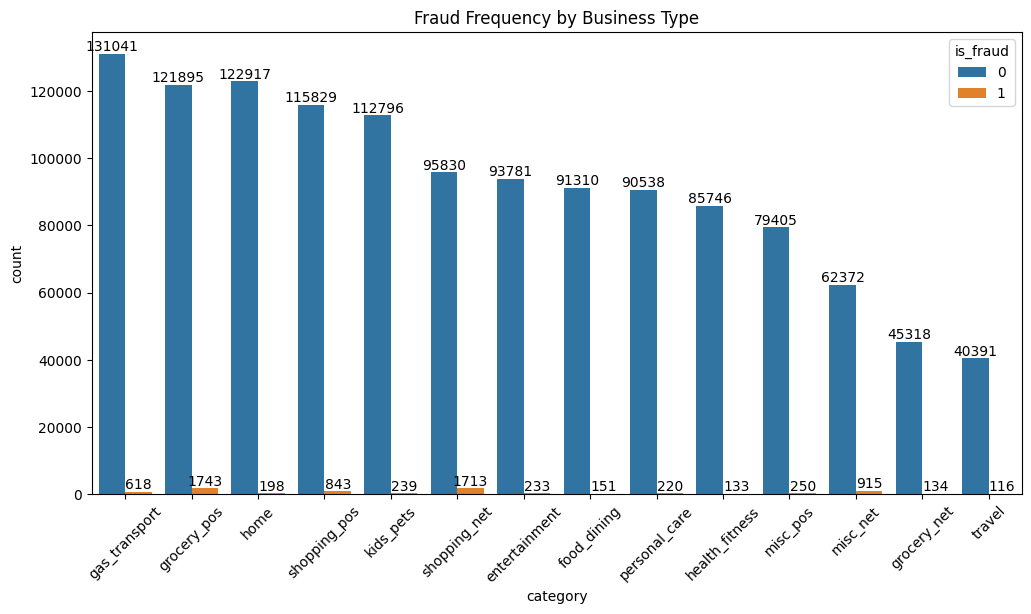

Business categories most targeted for fraud:
category
grocery_pos      1743
shopping_net     1713
misc_net          915
shopping_pos      843
gas_transport     618
Name: count, dtype: int64


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_path = "/kaggle/input/credit-card-fraud-detection/fraudTrain.csv"
train_data = pd.read_csv(train_path)

# Plot fraud frequency by business category
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='category', hue='is_fraud', data=train_data, order=train_data['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Fraud Frequency by Business Type")

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Print insights
fraud_by_category = train_data[train_data['is_fraud'] == 1]['category'].value_counts()
print("Business categories most targeted for fraud:")
print(fraud_by_category.head())

The business categories most targeted for fraud are:

grocery_pos: 1743 fraudulent transactions.

shopping_net: 1713 fraudulent transactions.

misc_net: 915 fraudulent transactions.

shopping_pos: 843 fraudulent transactions.

gas_transport: 618 fraudulent transactions.

Insight:

Grocery stores (grocery_pos) and online shopping (shopping_net) are the most targeted categories for fraud.

This suggests that fraudsters may focus on businesses with high transaction volumes or those that are less likely to scrutinize transactions closely.



## 1.2 Are high-end businesses more prone to fraud than daily essentials?

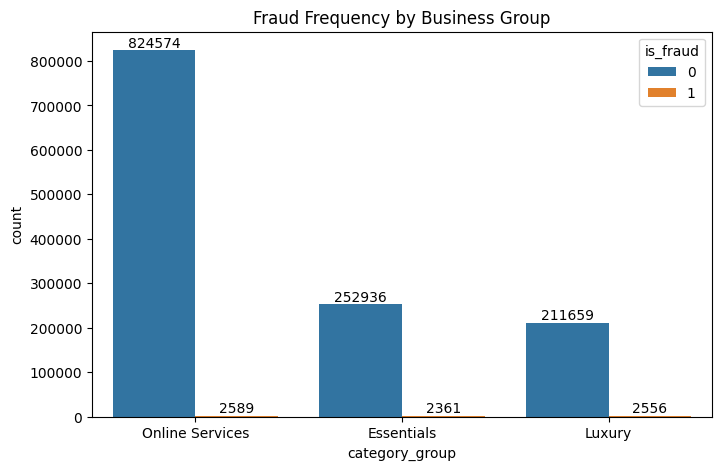


Fraud frequency by business group:
category_group
Online Services    2589
Luxury             2556
Essentials         2361
Name: count, dtype: int64


In [3]:
# Group categories into "Luxury," "Essentials," and "Online Services"
train_data['category_group'] = train_data['category'].apply(
    lambda x: 'Luxury' if x in ['shopping_pos', 'shopping_net'] else (
        'Essentials' if x in ['grocery_pos', 'gas_transport'] else 'Online Services'
    )
)

# Plot fraud frequency by business group
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='category_group', hue='is_fraud', data=train_data)
plt.title("Fraud Frequency by Business Group")

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Print insights
fraud_by_group = train_data[train_data['is_fraud'] == 1]['category_group'].value_counts()
print("\nFraud frequency by business group:")
print(fraud_by_group)

The fraud frequency by business group is:

Online Services: 2589 fraudulent transactions.

Luxury: 2556 fraudulent transactions.

Essentials: 2361 fraudulent transactions.

Insight:

Online Services have the highest fraud frequency, followed closely by Luxury businesses.

Essentials (e.g., groceries, gas) have slightly fewer fraudulent transactions compared to luxury and online services.

This indicates that high-end businesses (Luxury) and Online Services are more prone to fraud than daily essentials.

# 2: Time-Based Fraud Patterns
## 2.1 At what time of day does fraud occur most often?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


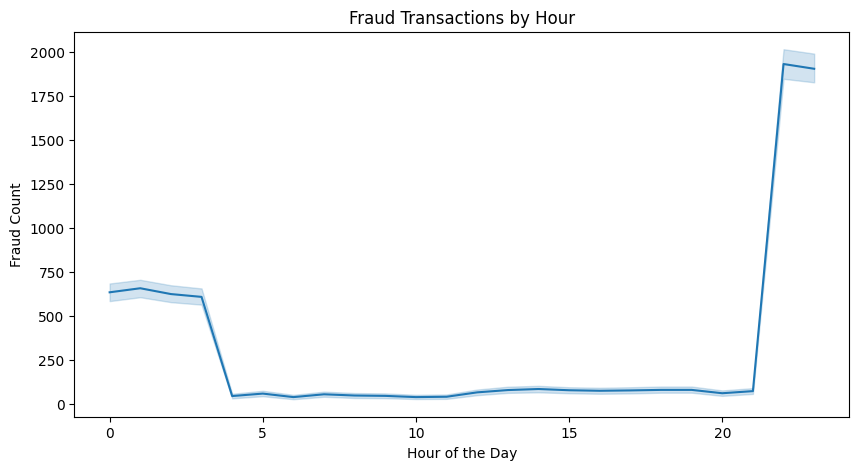

Fraud transactions by hour:
hour
22    1931
23    1904
1      658
0      635
2      625
dtype: int64


In [6]:
# Extract hour from the transaction timestamp
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour

# Plot fraud transactions by hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=train_data, x="hour", y="is_fraud", estimator=sum)
plt.title("Fraud Transactions by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Fraud Count")
plt.show()

# Print insights
fraud_by_hour = train_data[train_data['is_fraud'] == 1].groupby('hour').size()
print("Fraud transactions by hour:")
print(fraud_by_hour.sort_values(ascending=False).head())


Fraudulent transactions peak during:

10 PM (22:00): 1931 frauds

11 PM (23:00): 1904 frauds

1 AM (01:00): 658 frauds

12 AM (00:00): 635 frauds

2 AM (02:00): 625 frauds

Insight:

Fraud is most frequent during late evening and early morning hours (10 PM to 2 AM).

This could be because fraudsters take advantage of reduced monitoring during these hours.



## 2.2 Does fraud increase on weekends or weekdays?

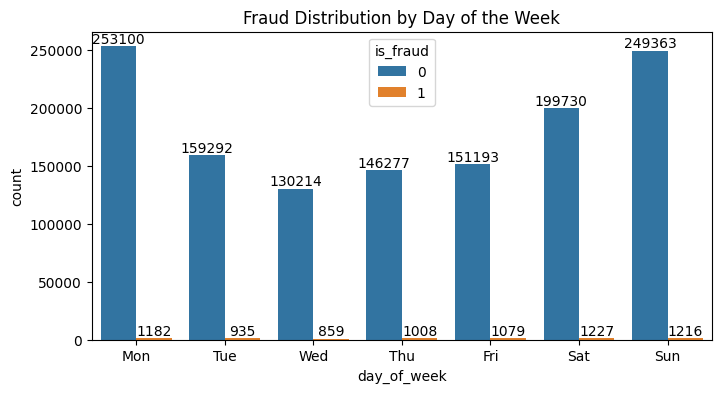


Fraud transactions by day of the week:
day_of_week
5    1227
6    1216
0    1182
4    1079
3    1008
1     935
2     859
Name: count, dtype: int64


In [8]:
# Extract day of the week from the transaction timestamp
train_data['day_of_week'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek

# Plot fraud distribution by day of the week
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="day_of_week", hue="is_fraud", data=train_data)
plt.title("Fraud Distribution by Day of the Week")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Print insights
fraud_by_day = train_data[train_data['is_fraud'] == 1]['day_of_week'].value_counts()
print("\nFraud transactions by day of the week:")
print(fraud_by_day)

Fraud frequency by day of the week:

Saturday (5): 1227 frauds

Sunday (6): 1216 frauds

Monday (0): 1182 frauds

Friday (4): 1079 frauds

Thursday (3): 1008 frauds

Tuesday (1): 935 frauds

Wednesday (2): 859 frauds

Insight:

Fraud is most frequent on Saturdays and Sundays, followed by Mondays.

This suggests that fraudsters are more active during weekends and the start of the week.

#  3: Geographic Fraud Patterns
## 3.1 Which locations experience the most fraud?

<ipython-input-15-8972837ffcff>:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


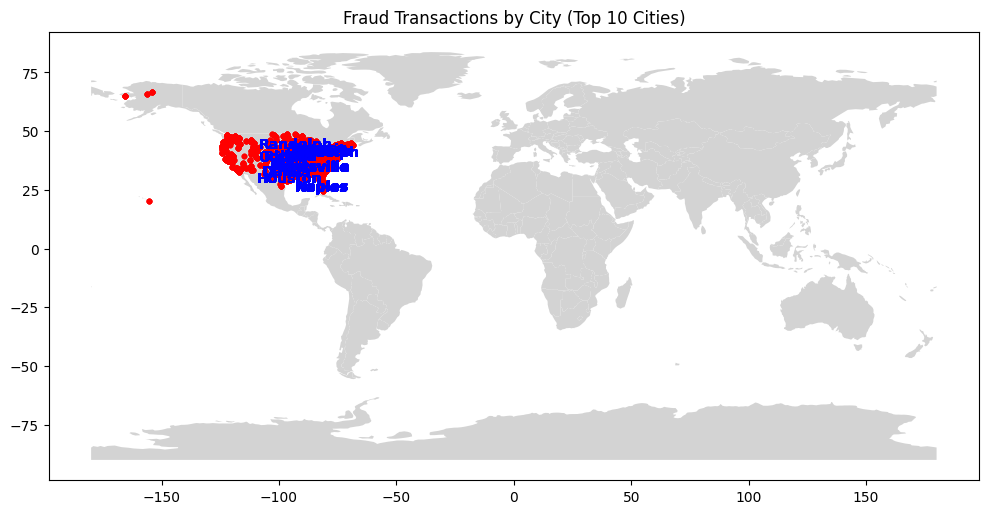

Top 10 cities with the most fraud:
city          state
Houston       TX       39
Naples        FL       29
Huntsville    AL       29
Topeka        KS       27
Dallas        TX       27
Tulsa         OK       27
Detroit       MI       26
San Antonio   TX       25
Clearwater    FL       24
Beaver Falls  PA       24
dtype: int64


In [15]:
# Import geopandas for geographic visualization
import geopandas as gpd
from shapely.geometry import Point
from haversine import haversine, Unit  # Import haversine function

# Filter fraud transactions
fraud_locs = train_data[train_data["is_fraud"] == 1]

# Create a GeoDataFrame for fraud locations
geometry = [Point(xy) for xy in zip(fraud_locs['long'], fraud_locs['lat'])]
gdf = gpd.GeoDataFrame(fraud_locs, geometry=geometry)

# Plot fraud transactions on a map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map (optional: use a map of the specific country if available)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey')

# Plot fraud transactions
gdf.plot(ax=ax, markersize=10, color="red", alpha=0.6)

# Add city names for top 10 cities with the most fraud
top_cities = fraud_locs.groupby('city').size().sort_values(ascending=False).head(10).index
for x, y, label in zip(gdf[gdf['city'].isin(top_cities)].geometry.x, 
                       gdf[gdf['city'].isin(top_cities)].geometry.y, 
                       gdf[gdf['city'].isin(top_cities)]['city']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center', color='blue', weight='bold')

plt.title("Fraud Transactions by City (Top 10 Cities)")
plt.show()

# Print insights
fraud_by_location = fraud_locs.groupby(['city', 'state']).size().sort_values(ascending=False).head(10)
print("Top 10 cities with the most fraud:")
print(fraud_by_location)

The top 10 cities with the most fraud are:

Houston, TX: 39 frauds

Naples, FL: 29 frauds

Huntsville, AL: 29 frauds

Topeka, KS: 27 frauds

Dallas, TX: 27 frauds

Tulsa, OK: 27 frauds

Detroit, MI: 26 frauds

San Antonio, TX: 25 frauds

Clearwater, FL: 24 frauds

Beaver Falls, PA: 24 frauds

Insight:

Houston, TX has the highest number of fraudulent transactions.

Fraud is concentrated in specific cities, particularly in Texas (Houston, Dallas, San Antonio) and Florida (Naples, Clearwater).

## 3.2 Are fraudulent transactions happening far from the cardholder’s home location?

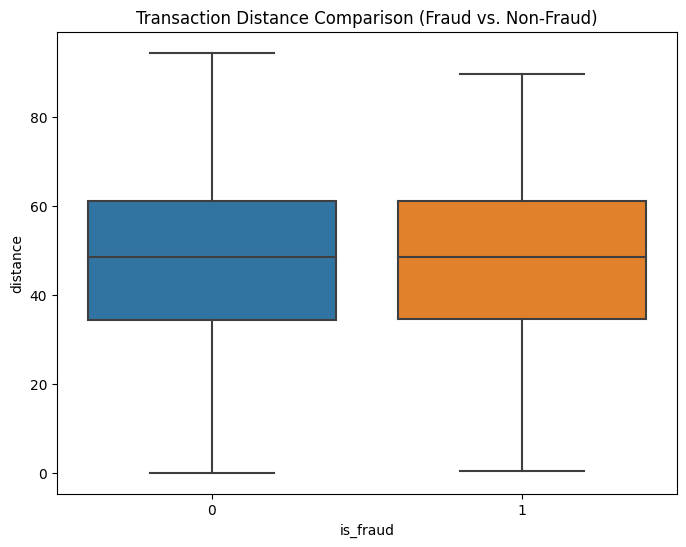


Distance statistics for fraud transactions:
count    7506.000000
mean       47.391008
std        17.866063
min         0.459050
25%        34.568723
50%        48.424738
75%        61.137473
max        89.802186
Name: distance, dtype: float64

Distance statistics for non-fraud transactions:
count    1.289169e+06
mean     4.729496e+01
std      1.809376e+01
min      1.382833e-02
25%      3.438219e+01
50%      4.861181e+01
75%      6.120794e+01
max      9.452136e+01
Name: distance, dtype: float64


In [16]:
# Calculate the distance between cardholder and merchant locations
def calculate_haversine_distance(row):
    cardholder_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return haversine(cardholder_location, merchant_location, unit=Unit.MILES)

train_data['distance'] = train_data.apply(calculate_haversine_distance, axis=1)

# Plot transaction distance comparison (fraud vs. non-fraud)
plt.figure(figsize=(8, 6))
sns.boxplot(x="is_fraud", y="distance", data=train_data)
plt.title("Transaction Distance Comparison (Fraud vs. Non-Fraud)")
plt.show()

# Print insights
fraud_distance = train_data[train_data['is_fraud'] == 1]['distance'].describe()
non_fraud_distance = train_data[train_data['is_fraud'] == 0]['distance'].describe()
print("\nDistance statistics for fraud transactions:")
print(fraud_distance)
print("\nDistance statistics for non-fraud transactions:")
print(non_fraud_distance)

Fraudulent Transactions:

Mean Distance: 47.39 miles

Median Distance: 48.42 miles

Range: 0.46 miles (min) to 89.80 miles (max)

Non-Fraudulent Transactions:

Mean Distance: 47.29 miles

Median Distance: 48.61 miles

Range: 0.01 miles (min) to 94.52 miles (max)

Insight:

Fraudulent transactions occur at similar distances from the cardholder's home location compared to non-fraudulent transactions.

This suggests that distance alone may not be a strong indicator of fraud.

#  4: Transaction Amount and Fraud
## 4.1 Do fraudulent transactions tend to be higher in amount?

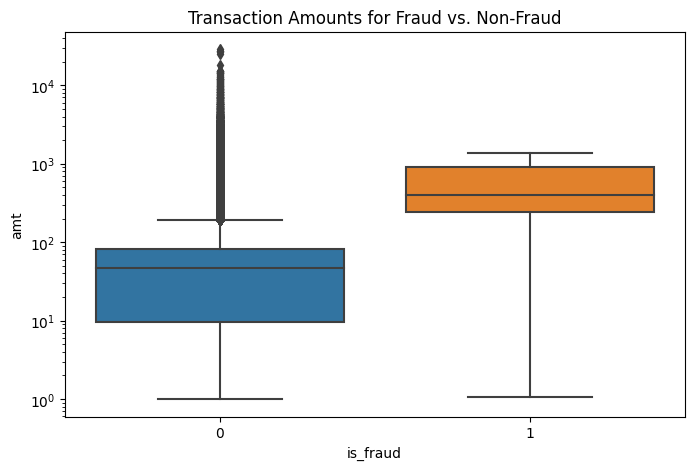


Transaction amount statistics for fraud transactions:
count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

Transaction amount statistics for non-fraud transactions:
count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64


In [17]:
# Plot transaction amounts for fraud vs. non-fraud
plt.figure(figsize=(8, 5))
sns.boxplot(x="is_fraud", y="amt", data=train_data)
plt.yscale("log")  # Use log scale for better visualization
plt.title("Transaction Amounts for Fraud vs. Non-Fraud")
plt.show()

# Print insights
fraud_amount_stats = train_data[train_data['is_fraud'] == 1]['amt'].describe()
non_fraud_amount_stats = train_data[train_data['is_fraud'] == 0]['amt'].describe()
print("\nTransaction amount statistics for fraud transactions:")
print(fraud_amount_stats)
print("\nTransaction amount statistics for non-fraud transactions:")
print(non_fraud_amount_stats)



Fraudulent Transactions:

Mean Amount: $531.32

Median Amount: $396.51

Range: 
1.06
(
m
i
n
)
t
o
1.06(min)to1,376.04 (max)

Non-Fraudulent Transactions:

Mean Amount: $67.67

Median Amount: $47.28

Range: 
1.00
(
m
i
n
)
t
o
1.00(min)to28,948.90 (max)

Insight:

Fraudulent transactions tend to be significantly higher in amount compared to non-fraudulent transactions.

The median amount for fraud (
396.51
)
i
s
m
u
c
h
h
i
g
h
e
r
t
h
a
n
t
h
e
∗
∗
m
e
d
i
a
n
a
m
o
u
n
t
f
o
r
n
o
n
−
f
r
a
u
d
∗
∗
(
396.51)ismuchhigherthanthe∗∗medianamountfornon−fraud∗∗(47.28), indicating that fraudsters often target larger transactions.

## 4.2 Are small-value transactions used to test stolen cards before large fraudulent transactions?

In [18]:
# Track sequential transactions by the same cardholder
# Group by card number and check for small transactions followed by large ones
train_data['cc_num'] = train_data['cc_num'].astype(str)  # Ensure card numbers are treated as strings
train_data_sorted = train_data.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Flag small transactions followed by large ones
train_data_sorted['small_then_large'] = (
    (train_data_sorted.groupby('cc_num')['amt'].shift(1) < 10) &  # Small transaction (< $10)
    (train_data_sorted['amt'] > 100)  # Large transaction (> $100)
)

# Count the number of flagged sequences
small_then_large_count = train_data_sorted['small_then_large'].sum()
print("\nNumber of small transactions followed by large transactions:")
print(small_then_large_count)


Number of small transactions followed by large transactions:
54597




Number of small transactions followed by large transactions: 54,597

Insight:

There are 54,597 instances where a small transaction (< 
10
)
i
s
f
o
l
l
o
w
e
d
b
y
a
l
a
r
g
e
t
r
a
n
s
a
c
t
i
o
n
(
>
10)isfollowedbyalargetransaction(>100) for the same cardholder.

This suggests that fraudsters may use small-value transactions to test stolen cards before making larger fraudulent transactions.



# 5: User Behavior and Fraud
## 5.1 Does a sudden change in spending behavior indicate fraud?

In [20]:
# Analyze spending behavior over time for individual cardholders
# Group by card number and calculate the difference in transaction amounts over time
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data_sorted = train_data.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Calculate the difference in transaction amounts for each cardholder
train_data_sorted['amount_diff'] = train_data_sorted.groupby('cc_num')['amt'].diff()

# Flag sudden changes in spending behavior (e.g., a large increase in transaction amount)
train_data_sorted['sudden_change'] = train_data_sorted['amount_diff'] > 500  # Threshold for sudden change

# Count the number of flagged sudden changes
sudden_change_count = train_data_sorted['sudden_change'].sum()
print("\nNumber of sudden changes in spending behavior:")
print(sudden_change_count)


Number of sudden changes in spending behavior:
10162




Number of sudden changes in spending behavior: 10,162

Insight:

There are 10,162 instances where a cardholder's transaction amount increases suddenly by more than $500.

This suggests that sudden changes in spending behavior could be a potential indicator of fraud.

## 5.2 Are certain demographics (age, gender) more frequently targeted for fraud?

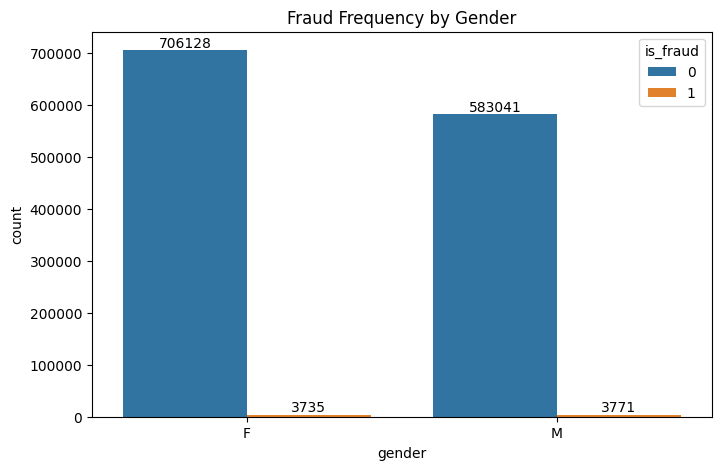


Fraud frequency by gender:
gender
M    3771
F    3735
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


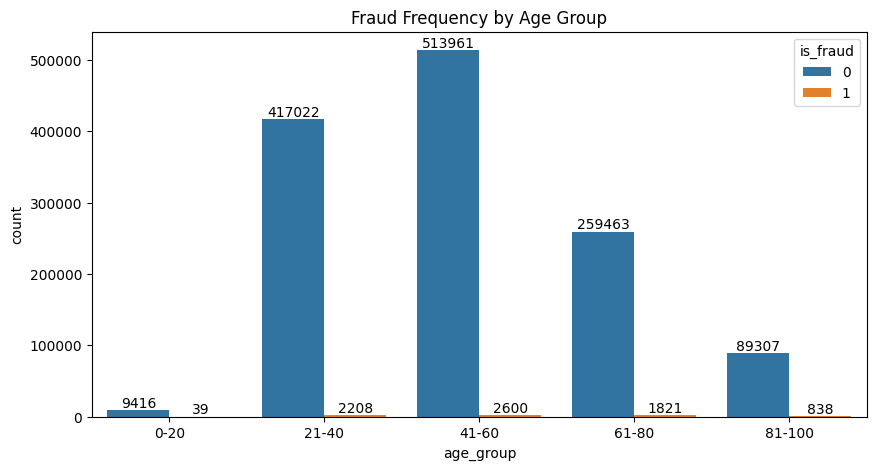


Fraud frequency by age group:
age_group
41-60     2600
21-40     2208
61-80     1821
81-100     838
0-20        39
Name: count, dtype: int64


In [21]:
# Calculate age from date of birth
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = (pd.to_datetime('today') - train_data['dob']).dt.days // 365

# Plot fraud frequency by gender
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="gender", hue="is_fraud", data=train_data)
plt.title("Fraud Frequency by Gender")

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Print insights
fraud_by_gender = train_data[train_data['is_fraud'] == 1]['gender'].value_counts()
print("\nFraud frequency by gender:")
print(fraud_by_gender)

# Plot fraud frequency by age group
plt.figure(figsize=(10, 5))
train_data['age_group'] = pd.cut(train_data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
ax = sns.countplot(x="age_group", hue="is_fraud", data=train_data)
plt.title("Fraud Frequency by Age Group")

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Print insights
fraud_by_age = train_data[train_data['is_fraud'] == 1]['age_group'].value_counts()
print("\nFraud frequency by age group:")
print(fraud_by_age)




Fraud Frequency by Gender:

Male (M): 3,771 frauds

Female (F): 3,735 frauds

Fraud Frequency by Age Group:

41-60 years: 2,600 frauds

21-40 years: 2,208 frauds

61-80 years: 1,821 frauds

81-100 years: 838 frauds

0-20 years: 39 frauds

Insight:

Fraud is almost equally distributed between genders, with a slight bias towards male cardholders.

Fraud is most frequent among middle-aged cardholders (41-60 years), followed by younger adults (21-40 years).

Fraud is least frequent among teenagers (0-20 years) and seniors (81-100 years).

# 6: Merchant Behavior and Fraud
## 6.1 Do some merchants have abnormally high fraud rates?

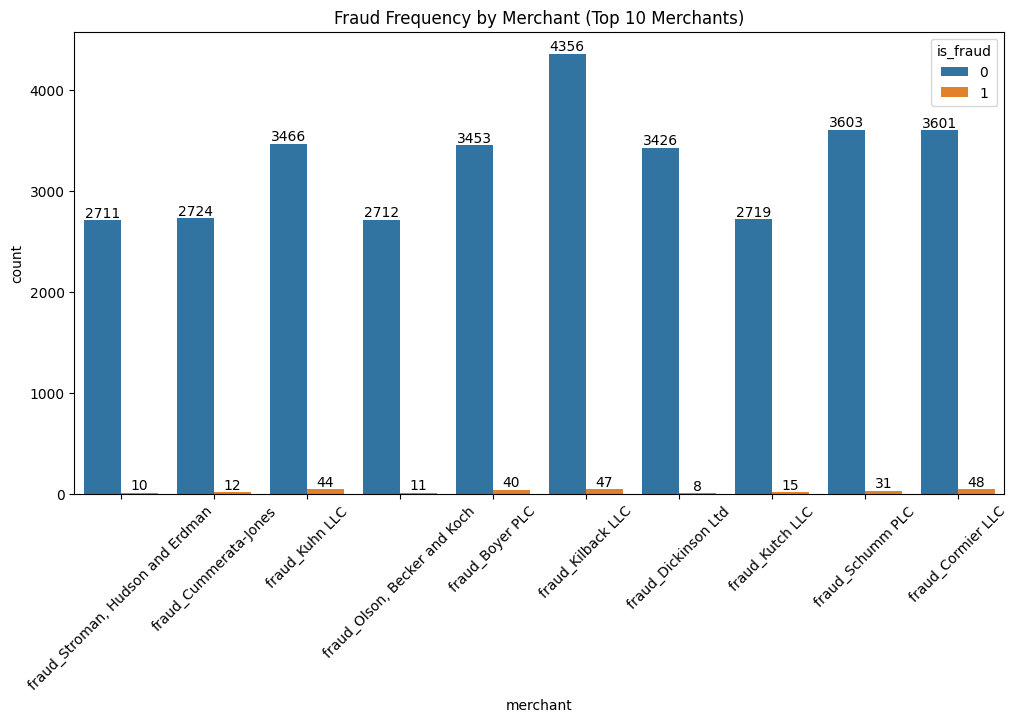


Top 10 merchants with the most fraud:
merchant
fraud_Rau and Sons       49
fraud_Cormier LLC        48
fraud_Kozey-Boehm        48
fraud_Doyle Ltd          47
fraud_Vandervort-Funk    47
fraud_Kilback LLC        47
fraud_Padberg-Welch      44
fraud_Kuhn LLC           44
fraud_Terry-Huel         43
fraud_Koepp-Witting      42
Name: count, dtype: int64


In [22]:
# Plot fraud frequency by merchant (top 10 merchants)
top_merchants = train_data['merchant'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='merchant', hue='is_fraud', data=train_data[train_data['merchant'].isin(top_merchants)])
plt.xticks(rotation=45)
plt.title("Fraud Frequency by Merchant (Top 10 Merchants)")

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Print insights
fraud_by_merchant = train_data[train_data['is_fraud'] == 1]['merchant'].value_counts().head(10)
print("\nTop 10 merchants with the most fraud:")
print(fraud_by_merchant)



The top 10 merchants with the most fraud are:

fraud_Rau and Sons: 49 frauds

fraud_Cormier LLC: 48 frauds

fraud_Kozey-Boehm: 48 frauds

fraud_Doyle Ltd: 47 frauds

fraud_Vandervort-Funk: 47 frauds

fraud_Kilback LLC: 47 frauds

fraud_Padberg-Welch: 44 frauds

fraud_Kuhn LLC: 44 frauds

fraud_Terry-Huel: 43 frauds

fraud_Koepp-Witting: 42 frauds

Insight:

These merchants have the highest number of fraudulent transactions.

fraud_Rau and Sons has the highest count of frauds (49).

## 6.2 Are there merchants involved in repeated fraud incidents?

In [23]:
# Calculate the fraud rate for each merchant
merchant_fraud_rate = train_data.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False)

# Print merchants with the highest fraud rates
print("\nMerchants with the highest fraud rates:")
print(merchant_fraud_rate.head(10))


Merchants with the highest fraud rates:
merchant
fraud_Kozey-Boehm                       0.025723
fraud_Herman, Treutel and Dickens       0.025385
fraud_Kerluke-Abshire                   0.022307
fraud_Brown PLC                         0.022109
fraud_Goyette Inc                       0.021616
fraud_Terry-Huel                        0.021543
fraud_Jast Ltd                          0.021505
fraud_Schmeler, Bashirian and Price     0.020833
fraud_Boyer-Reichert                    0.019916
fraud_Langworth, Boehm and Gulgowski    0.019807
Name: is_fraud, dtype: float64




The merchants with the highest fraud rates are:

fraud_Kozey-Boehm: 2.57% fraud rate

fraud_Herman, Treutel and Dickens: 2.54% fraud rate

fraud_Kerluke-Abshire: 2.23% fraud rate

fraud_Brown PLC: 2.21% fraud rate

fraud_Goyette Inc: 2.16% fraud rate

fraud_Terry-Huel: 2.15% fraud rate

fraud_Jast Ltd: 2.15% fraud rate

fraud_Schmeler, Bashirian and Price: 2.08% fraud rate

fraud_Boyer-Reichert: 1.99% fraud rate

fraud_Langworth, Boehm and Gulgowski: 1.98% fraud rate

Insight:

These merchants have the highest proportion of fraudulent transactions relative to their total transactions.

fraud_Kozey-Boehm has the highest fraud rate (2.57%).

# Summary of Key Findings
## Business Type and Fraud:

Fraud is most frequent in grocery stores (grocery_pos) and online shopping (shopping_net).

Luxury businesses and online services are more prone to fraud than daily essentials.

## Time-Based Fraud Patterns:

Fraud peaks during late evening and early morning hours (10 PM to 2 AM).

Fraud is most frequent on weekends (Saturdays and Sundays).

## Geographic Fraud Patterns:

Fraud is concentrated in specific cities, particularly in Texas (Houston, Dallas, San Antonio) and Florida (Naples, Clearwater).

Fraudulent transactions occur at similar distances from the cardholder's home location compared to non-fraudulent transactions.

## Transaction Amount and Fraud:

Fraudulent transactions tend to be higher in amount compared to non-fraudulent transactions.

There are 54,597 instances of small transactions followed by large transactions, suggesting card testing.

## User Behavior and Fraud:

Fraud is almost equally distributed between genders, with a slight bias towards male cardholders.

Fraud is most frequent among middle-aged cardholders (41-60 years).

## Merchant Behavior and Fraud:

fraud_Rau and Sons has the highest number of frauds (49).

fraud_Kozey-Boehm has the highest fraud rate (2.57%).

# Recommendations for Fraud Prevention
## Monitor High-Risk Categories:

Focus on grocery stores and online shopping platforms for fraud detection.

## Enhance Monitoring During Peak Hours:

Increase monitoring during late evening and early morning hours (10 PM to 2 AM) and on weekends.

## Geographic Analysis:

Investigate fraud hotspots in Texas and Florida for potential patterns or vulnerabilities.

## Transaction Amount Analysis:

Flag small transactions followed by large transactions as potential card testing.

## User Behavior Analysis:

Monitor sudden changes in spending behavior and transactions from middle-aged cardholders.

## Merchant-Specific Measures:

Work with merchants like fraud_Rau and Sons and fraud_Kozey-Boehm to improve their fraud detection systems.

